# Final Project – Stock vs Revenue Dashboard (Tesla & GameStop)

This notebook follows the IBM course assignment. Fill in each section and take screenshots of **code + output**.

## Contents
1. Question 1 – Extract Tesla Stock Data with `yfinance`  
2. Question 2 – Webscrape Tesla Revenue Data  
3. Question 3 – Extract GameStop Stock Data with `yfinance`  
4. Question 4 – Webscrape GameStop Revenue Data
5. Question 5 – Plot Tesla Stock vs Revenue  
6. Question 6 – Plot GameStop Stock vs Revenue  
7. Question 7 – Share your notebook link  

## Question 1 – Use `yfinance` to Extract Tesla Stock Data
Reset the index, save, and display the first five rows of the `tesla_data` dataframe using `head()`.
Take a screenshot of the code and output.

In [10]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 – Webscraping to Extract Tesla Revenue Data
Display the last five rows of the `tesla_revenue` dataframe using `tail()`.

In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text

soup = BeautifulSoup(html, "html.parser")
table = soup.find_all("table")[0]
tesla_revenue = pd.read_html(str(table))[0]

# Limpieza
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"].replace("[\\$,]", "", regex=True).replace("None", "")
)
tesla_revenue.dropna(inplace=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue = tesla_revenue.dropna().sort_values("Date").reset_index(drop=True)

tesla_revenue.tail()

C:\Users\sarag\AppData\Local\Temp\ipykernel_22144\3823095218.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


,Date,Revenue
10,2020,31536
11,2021,53823
12,2022,81462
13,2023,96773
14,2024,97690


## Question 3 – Use `yfinance` to Extract GameStop (GME) Stock Data
Reset the index, save, and display the first five rows of the `gme_data` dataframe using `head()`.

In [23]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Optional: save to CSV
gme_data.to_csv("gme_stock_data.csv", index=False)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 – Webscraping to Extract GameStop Revenue Data
Display the last five rows of the `gme_revenue` dataframe using `tail()`.

In [26]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

soup = BeautifulSoup(html, "html.parser")
table = next(t for t in soup.find_all("table")
             if "Quarterly Revenue" in t.get_text())

gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = (gme_revenue["Revenue"]
                          .astype(str).str.replace(r"[$,]", "", regex=True)
                          .replace("None", ""))
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue = gme_revenue.dropna().sort_values("Date").reset_index(drop=True)

gme_revenue.tail()

C:\Users\sarag\AppData\Local\Temp\ipykernel_22144\3244762417.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


,Date,Revenue
54,2024-07-31,798
55,2024-10-31,860
56,2025-01-31,1283
57,2025-04-30,732
58,2025-07-31,972


## Question 5 – Plot Tesla Stock Graph
Use `make_graph` to plot Tesla stock data vs revenue.

C:\Users\sarag\AppData\Local\Temp\ipykernel_22144\423071064.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


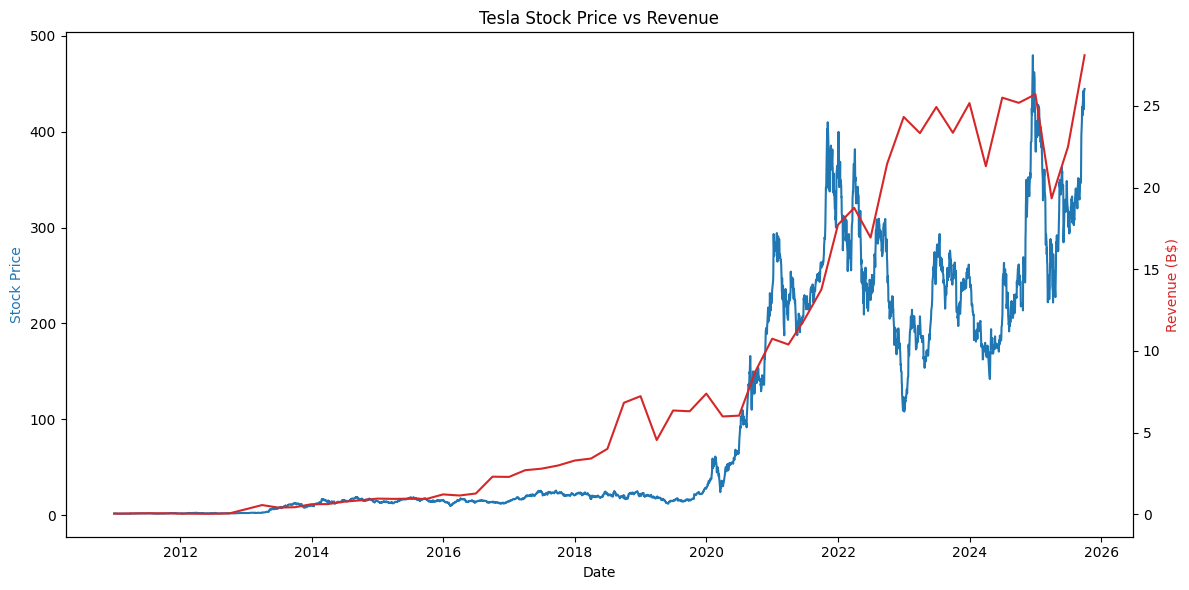

In [73]:
import matplotlib.pyplot as plt

# Stock data (TSLA)
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Revenue data (TSLA) 
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text
soup = BeautifulSoup(html, "html.parser")
table = next(t for t in soup.find_all("table") if "Quarterly Revenue" in t.get_text())

# Date & Revenue
tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue = tesla_revenue.iloc[:, :2].copy()
tesla_revenue.columns = ["Date", "Revenue"]

# Function make_graph
def make_graph(s, r, name):
    s = s.copy(); r = r.copy()
    s["Date"] = pd.to_datetime(s["Date"]).dt.tz_localize(None)
    r["Date"] = pd.to_datetime(r["Date"], errors="coerce")
    r["Revenue"] = (
        r["Revenue"].astype(str)
        .str.replace(r"[\$,]", "", regex=True).str.strip()
    )
    r["Revenue"] = pd.to_numeric(r["Revenue"], errors="coerce")
    s = s.dropna(subset=["Date"]); r = r.dropna(subset=["Date", "Revenue"])
    start = max(s["Date"].min(), r["Date"].min())
    end   = min(s["Date"].max(), r["Date"].max())
    s = s[(s["Date"]>=start) & (s["Date"]<=end)]
    r = r[(r["Date"]>=start) & (r["Date"]<=end)]

    rev = r["Revenue"]
    unit = "Revenue ($M)"
    if rev.max() > 1000:
        rev = rev/1000.0
        unit = "Revenue (B$)"

    # Plot
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(s["Date"], s["Close"], color="tab:blue")
    ax1.set_xlabel("Date"); ax1.set_ylabel("Stock Price", color="tab:blue")

    ax2 = ax1.twinx()
    ax2.plot(r["Date"], rev, color="tab:red")
    ax2.set_ylabel(unit, color="tab:red")

    plt.title(f"{name} Stock Price vs Revenue")
    plt.tight_layout(); plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla")

## Question 6 – Plot GameStop Stock Graph
Use `make_graph` to plot GameStop stock data vs revenue. Take a screenshot of the graph.

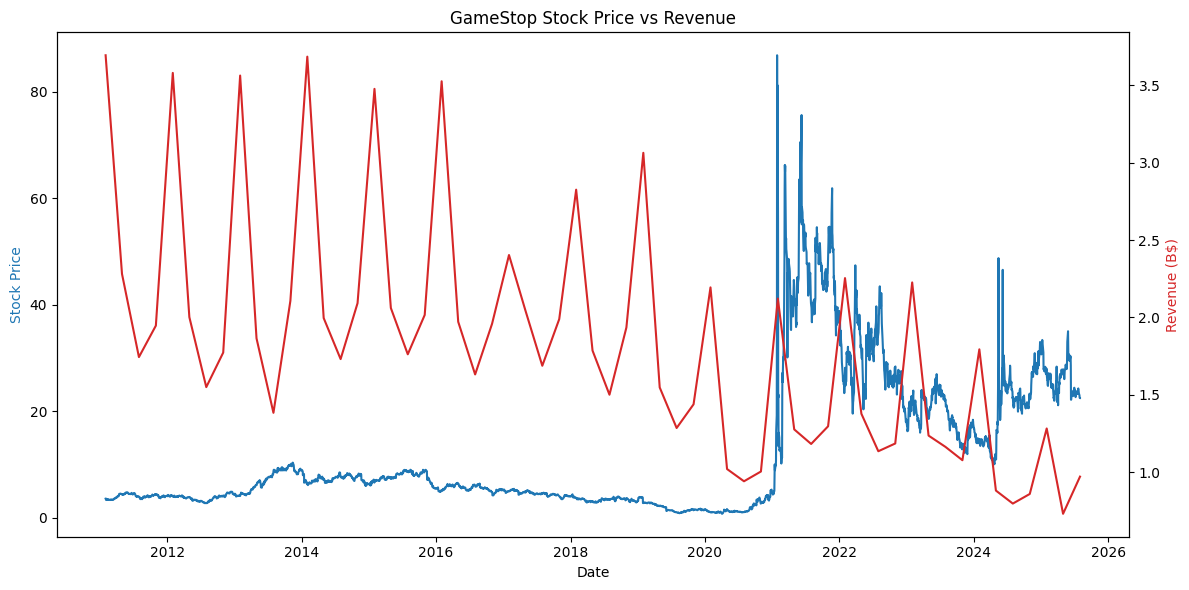

In [74]:
make_graph(gme_data, gme_revenue, "GameStop")

## Question 7 – Share Your Notebook
Upload this notebook to GitHub or share a public link (e.g., from Google Colab or IBM Watson Studio).

**My public link:** <paste here>

---
_Notebook completed by Sara Guillén. Generated on 4/11/2025._